In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py

## LiZnSb data part

In [62]:
import tensorly as tl
# visulize eigenvalues
raw_data_unfold = np.matrix(tl.unfold(raw_data,2))

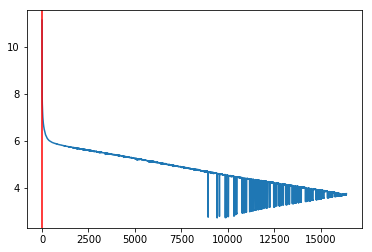

In [63]:
from numpy import linalg as LA
temp = raw_data_unfold * raw_data_unfold.getH() # multiply with its complex conjugate to get a square matrix
e = LA.eigvals(temp)
e = np.sqrt(e)
plt.plot(np.log(e))
plt.axvline(x=9,color='r')

In [21]:
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'Experiment_noisy_LiZnSb.mat')
raw_data = raw_data['datacube']

f = h5py.File(path + 'Experiment_tensor_LiZnSb_35-38-180.mat','r')
denoised_data = {}
for k, v in f.items():
    denoised_data[k] = np.array(v)
denoised_data = denoised_data['est_HOOI']

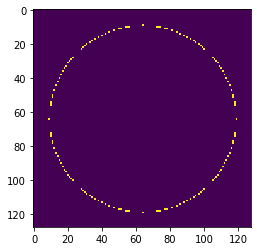

In [22]:
# A circular mask with less points can be generated by using a smaller gap between two radii
circular_mask = create_circular_mask(128, 128, center=(64,64), radius=55) & \
~create_circular_mask(128, 128, center=(64,64), radius=54.5)
plt.imshow(circular_mask)
ADF_noisy = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_denoised = np.zeros((raw_data.shape[0],raw_data.shape[1]))

for i in range(128):
    for j in range(128):
        if circular_mask[i,j] == 1:
            ADF_noisy = ADF_noisy + raw_data[:,:,i*128+j]
            ADF_denoised = ADF_denoised + denoised_data[i*128+j,:,:]

Text(0.5, 1.0, 'Denoised')

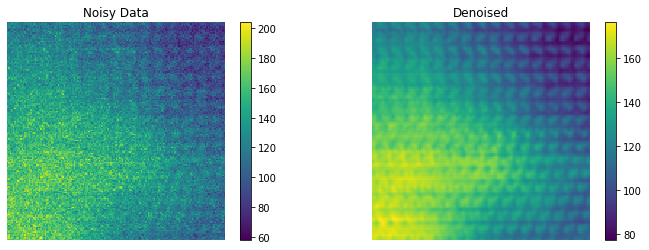

In [23]:
# Compare real space structure from ADF reconstrcutred from a ring with width = 1
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(ADF_noisy)
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.transpose(ADF_denoised))
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

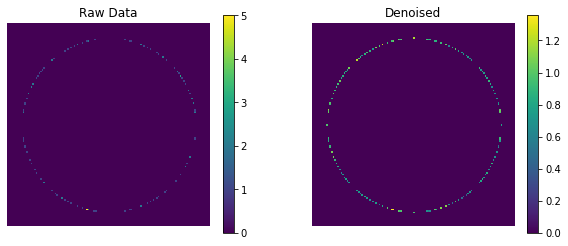

In [24]:
# Compare single CBED
temp = denoised_data[:,2,2]
temp = temp.reshape(128,128)

# circular_mask = create_circular_mask(128, 128, center=(64,64), radius=45) & \
# ~create_circular_mask(128, 128, center=(64,64), radius=0)

plt.figure(figsize=(10,4))

plt.subplot(122)
plt.imshow(temp*circular_mask)
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(121)
plt.imshow(raw_data[2,2,:].reshape(128,128)*circular_mask)
plt.title('Raw Data')
plt.axis('off')
plt.colorbar()

Text(0.5, 0, 'Components')

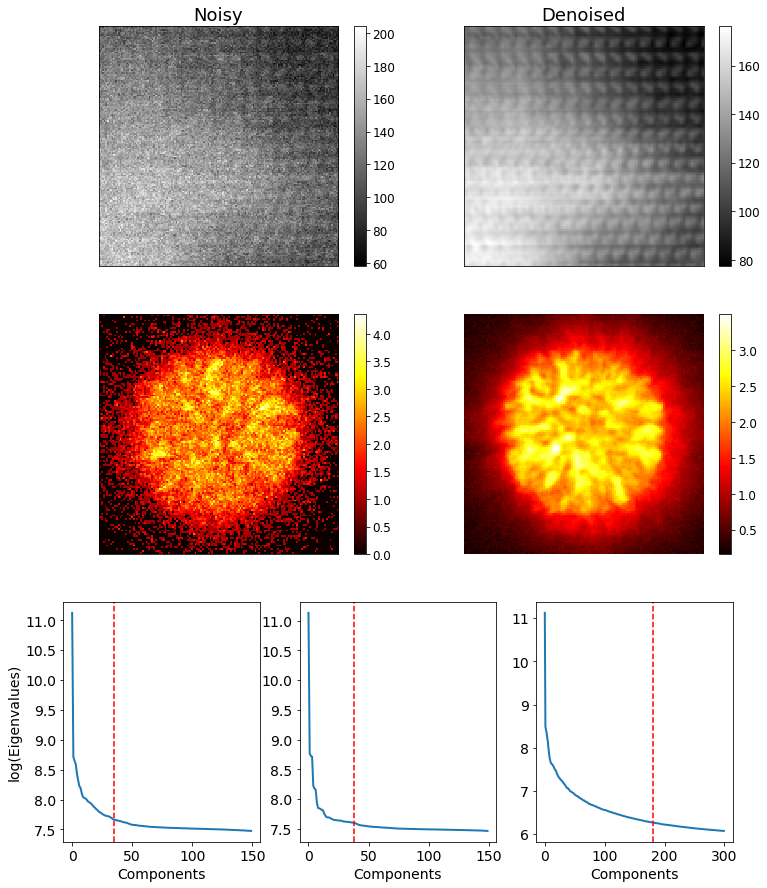

In [25]:
# overall plot
fig = plt.figure(figsize=(12,15))

fig.add_subplot(321)
plt.imshow(ADF_noisy,cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
# plt.ylabel('Reconstructed ADF', fontsize=18)

fig.add_subplot(322)
plt.imshow(np.transpose(ADF_denoised),cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.title('Denoised',fontsize=18)


# plot CBED patterns
rx = 50
ry = 50

temp = denoised_data[:,rx,ry]
temp = temp.reshape(128,128)

plt.subplot(324)
plt.imshow(np.sqrt(temp),cmap='hot')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.axis('off')

temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_LiZnSb_eigenvalues.mat')

plt.subplot(323)
plt.imshow(np.sqrt(raw_data[2,2,:].reshape(128,128)),cmap='hot')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.xticks([])
plt.yticks([])
# plt.ylabel('Single CBED', fontsize=18)

fig.add_subplot(337)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=35,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(338)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=38,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(339)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:300]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=180,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

In [ ]:
np.log(e3[195])

[0.93539094]


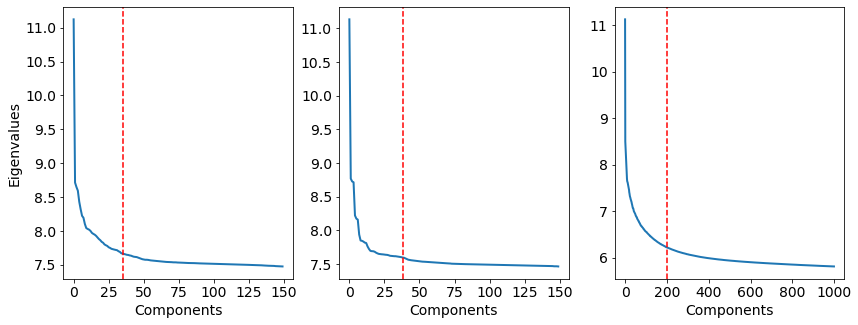

In [28]:
# Analysis eigenvalues
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_LiZnSb_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=35,color='r',ls='--')
plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=38,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:1000]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=200,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

scree = temp['scree3']
scree = scree[::-1]
# print(scree[0:100])
print(scree[1300])

Text(0.5, 0, 'Components')

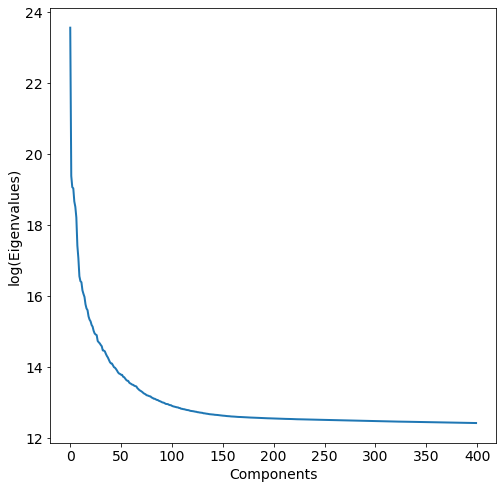

In [40]:
fig = plt.figure(figsize=(8,8))
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=200,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

## STO data part

In [11]:
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'Experiment_noisy_STO_010619_S3.mat')
raw_data = raw_data['datacube']

f = h5py.File(path + 'Experiment_tensor_STO_010619_S3_30-32-70.mat','r')
denoised_data = {}
for k, v in f.items():
    denoised_data[k] = np.array(v)
denoised_data = denoised_data['est_HOOI']

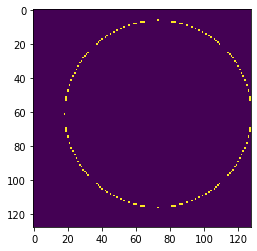

In [12]:
# A circular mask with less points can be generated by using a smaller gap between two radii
# Zero disk radius = 42
circular_mask = create_circular_mask(128, 128, center=(73,61), radius=55) & \
~create_circular_mask(128, 128, center=(73,61), radius=54.5)
plt.imshow(circular_mask)
ADF_noisy = np.zeros((raw_data.shape[0],raw_data.shape[1]))
ADF_denoised = np.zeros((raw_data.shape[0],raw_data.shape[1]))

for i in range(128):
    for j in range(128):
        if circular_mask[i,j] == 1:
            ADF_noisy = ADF_noisy + raw_data[:,:,i*128+j]
            ADF_denoised = ADF_denoised + denoised_data[i*128+j,:,:]

Text(0.5, 1.0, 'Denoised')

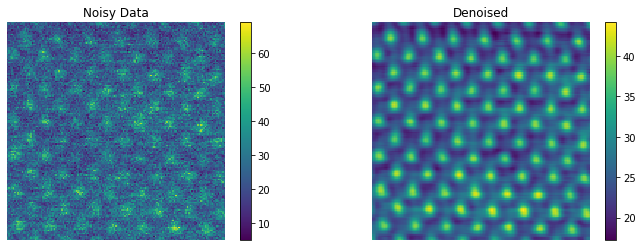

In [13]:
# Compare real space structure from ADF reconstrcutred from a ring with width = 1
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(ADF_noisy)
plt.title('Noisy Data')
plt.axis('off')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.transpose(ADF_denoised))
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

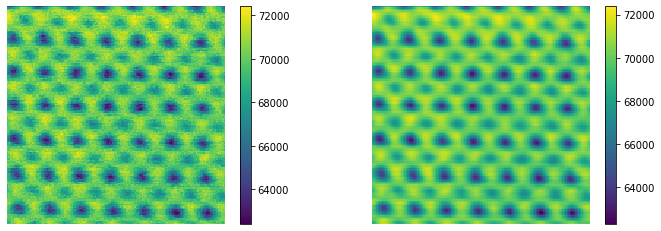

In [14]:
plt.figure(figsize=(12,4))

plt.subplot(121)
plt.imshow(np.sum(raw_data,axis=2))
plt.axis('off')
plt.colorbar()

plt.subplot(122)
plt.imshow(np.transpose(np.sum(denoised_data,axis=0)))
plt.axis('off')
plt.colorbar()

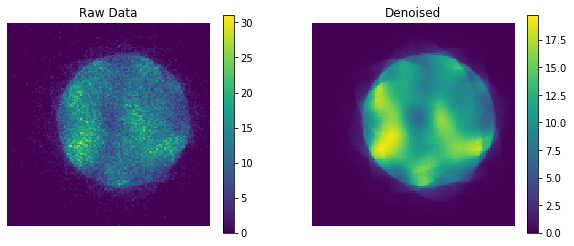

In [15]:
# Compare single CBED

# circular_mask = create_circular_mask(128, 128, center=(73,61), radius=45) & \
# ~create_circular_mask(128, 128, center=(73,61), radius=0)


temp = denoised_data[:,2,2]
temp = temp.reshape(128,128)

plt.figure(figsize=(10,4))

plt.subplot(122)
# plt.imshow(temp*circular_mask)
plt.imshow(temp)
# plt.scatter(64,68)
plt.colorbar()
plt.axis('off')
plt.title('Denoised')

plt.subplot(121)
plt.imshow(raw_data[2,2,:].reshape(128,128))
# plt.scatter(74,60)
plt.title('Raw Data')
plt.axis('off')
plt.colorbar()

Text(0.5, 0, 'Components')

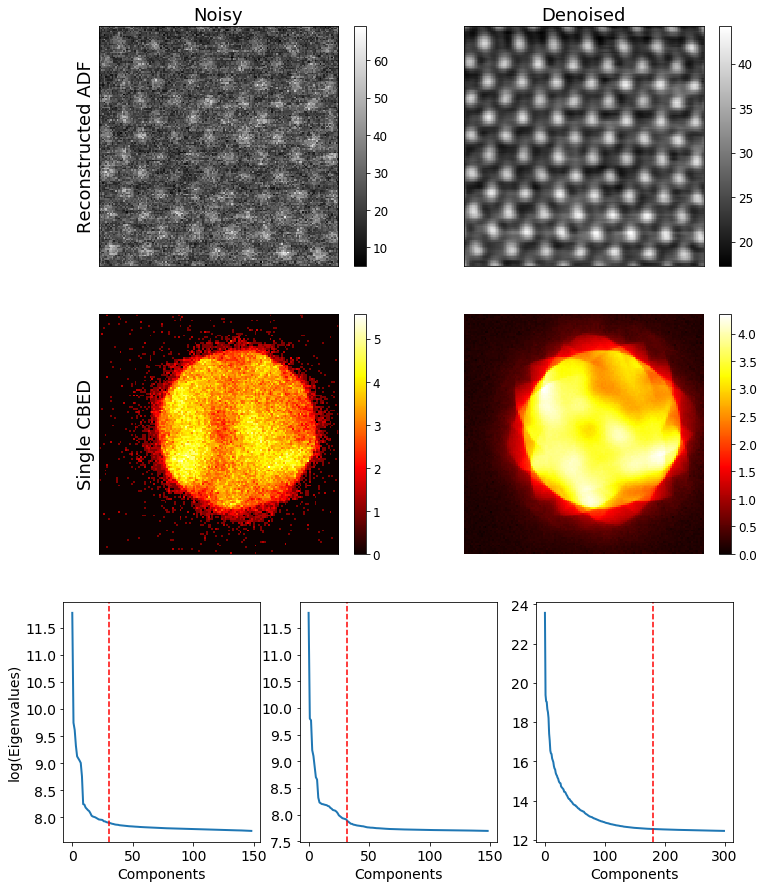

In [19]:
# overall plot
fig = plt.figure(figsize=(12,15))

fig.add_subplot(321)
plt.imshow(ADF_noisy,cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.title('Noisy',fontsize=18)
plt.ylabel('Reconstructed ADF', fontsize=18)

fig.add_subplot(322)
plt.imshow(np.transpose(ADF_denoised),cmap='gray')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.title('Denoised',fontsize=18)


# plot CBED patterns
rx = 50
ry = 50

temp = denoised_data[:,rx,ry]
temp = temp.reshape(128,128)
temp[temp<0]=0

plt.subplot(324)
plt.imshow(np.sqrt(temp),cmap='hot')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.axis('off')


plt.subplot(323)
plt.imshow(np.sqrt(raw_data[2,2,:].reshape(128,128)),cmap='hot')
cbar = plt.colorbar(fraction = 0.046, pad = 0.05)
cbar.ax.tick_params(labelsize = 12)
# cbar.ax.set_title('$e^{-}$',fontsize=18)
plt.xticks([])
plt.yticks([])
plt.ylabel('Single CBED', fontsize=18)

temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_STO_010619_S3_eigenvalues.mat')

fig.add_subplot(337)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=30,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(338)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=32,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(339)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:300]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=180,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

Text(0.5, 0, 'Components')

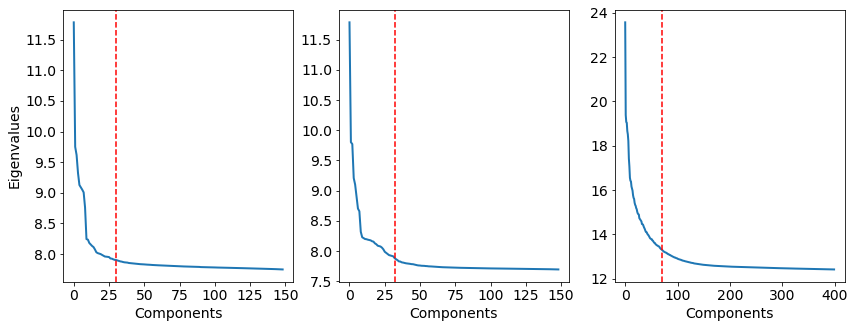

In [34]:
# Analysis eigenvalues
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Experiment_noisy_STO_010619_S3_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=30,color='r',ls='--')
plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=32,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:400]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=70,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)



Text(0.5, 0, 'Components')

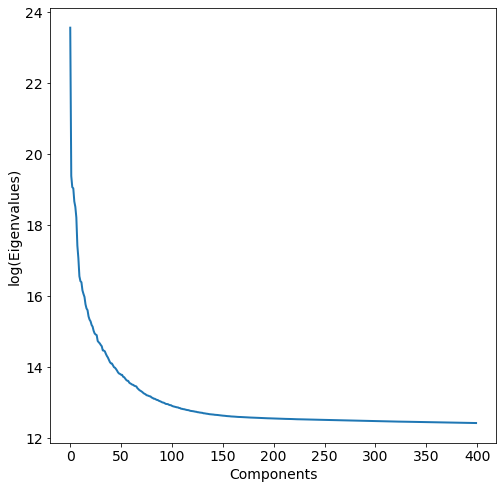

In [38]:
fig = plt.figure(figsize=(8,8))
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[0:400]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.axvline(x=70,color='r',ls='--')
plt.ylabel('log(Eigenvalues)',fontsize=14)
plt.xlabel('Components',fontsize=14)

## Visulize components

(-0.5, 149.5, 149.5, -0.5)

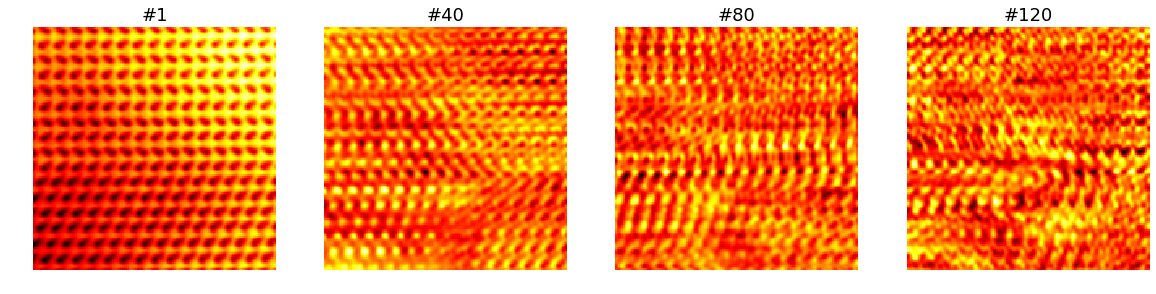

In [375]:
components = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/Components_LiZnSb_exp_32-150.mat')
components = components['prototype']

fig = plt.figure(figsize=(20,15))
fig.add_subplot(141)
plt.imshow(components[:,:,0],cmap='hot')
plt.title('#1',fontsize=18)
plt.axis('off')

fig.add_subplot(142)
plt.imshow(components[:,:,40],cmap='hot')
plt.title('#40',fontsize=18)
plt.axis('off')

fig.add_subplot(143)
plt.imshow(components[:,:,80],cmap='hot')
plt.title('#80',fontsize=18)
plt.axis('off')

fig.add_subplot(144)
plt.imshow(components[:,:,149],cmap='hot')
plt.title('#120',fontsize=18)
plt.axis('off')

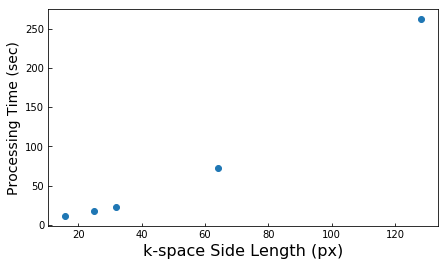

In [41]:
# Plot processing time vs dataset size
angle_list = [10.78,17.06,22.66,72.51,262.53]
layer_list = [16,25,32,64,128]

fig, ax = plt.subplots(figsize=(7,4))
fig.canvas.draw()
ax.scatter(layer_list,angle_list)
plt.ylabel('Processing Time (sec)',fontsize=14)
plt.xlabel('k-space Side Length (px)',fontsize=16)
# labels = ['','1', '', '2', '', '3', '', '4', '', '', '']
# plt.grid('on')
ax.tick_params(direction='in')
# labels = [item.get_text() for item in ax.get_xticklabels()]
# print(labels)
# labels[1] = 'Testing'

# ax.set_xticklabels(labels)

plt.show()

In [5]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask